# Рубежный контроль №1 
## Рысьева Елизавета Антоновна 
### Вариант 15 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
import plotly.express as px

In [2]:
df = pd.read_csv('googleplaystore_.csv')

## Получим общую информацию о датасете.

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
draw_missing(df)

,Total,Percent
Rating,1474,13.596532
Current Ver,8,0.073794
Android Ver,3,0.027673
Type,1,0.009224
Content Rating,1,0.009224
App,0,0.000000
Category,0,0.000000
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000


### Выясним в каких типах данных присутствуют пропуски 

In [6]:
total_count = df.shape[0]

In [7]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt =='int64') :
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Rating. Тип данных float64. Количество пустых значений 1474, 13.6%.


In [8]:
df_num = df[num_cols]
df_num

,Rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3
...,...
10836,4.5
10837,5.0
10838,NaN
10839,4.5


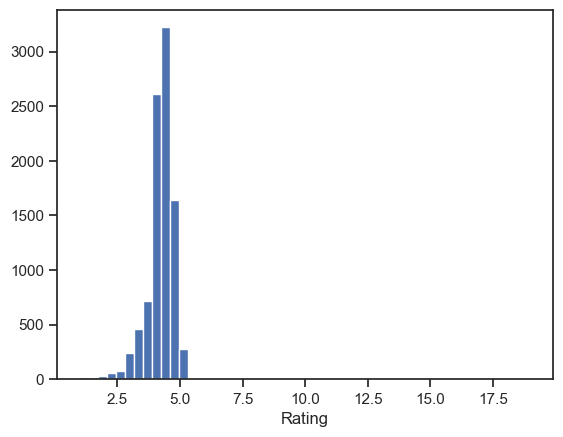

In [9]:
for col in df_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

Для обработки пропусков возьмем колонку Neighborhoods (old). Заметим, что данные распредлены волнами, поэтому для обработки будем использовать более сложную функцию, которая позволяет задавать колонку и вид импьютации

In [10]:
strategies=['mean', 'median', 'most_frequent'] 

In [11]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [12]:
test_num_impute_col(df, 'Rating', strategies[0])

('Rating', 'mean', 1474, 4.193338315362443, 4.193338315362443)

In [13]:
test_num_impute_col(df, 'Rating', strategies[1])

('Rating', 'median', 1474, 4.3, 4.3)

In [14]:
test_num_impute_col(df, 'Rating', strategies[2])

('Rating', 'most_frequent', 1474, 4.4, 4.4)

Заметим, что стратегии распределились одинаково, что было заметно и на графике, поэтому заполним пропуски медианой

In [15]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

In [16]:
num_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and dt=='object' :
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Type. Тип данных object. Количество пустых значений 1, 0.01%.
Колонка Content Rating. Тип данных object. Количество пустых значений 1, 0.01%.
Колонка Current Ver. Тип данных object. Количество пустых значений 8, 0.07%.
Колонка Android Ver. Тип данных object. Количество пустых значений 3, 0.03%.


In [17]:
df_num = df[num_cols]
df_num

,Type,Content Rating,Current Ver,Android Ver
0,Free,Everyone,1.0.0,4.0.3 and up
1,Free,Everyone,2.0.0,4.0.3 and up
2,Free,Everyone,1.2.4,4.0.3 and up
3,Free,Teen,Varies with device,4.2 and up
4,Free,Everyone,1.1,4.4 and up
...,...,...,...,...
10836,Free,Everyone,1.48,4.1 and up
10837,Free,Everyone,1.0,4.1 and up
10838,Free,Everyone,1.0,2.2 and up
10839,Free,Mature 17+,Varies with device,Varies with device


In [18]:
cat_temp_data = df[['Type']]
cat_temp_data.head()

,Type
0,Free
1,Free
2,Free
3,Free
4,Free


In [19]:
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Free'],
       ['Free'],
       ['Free'],
       ...,
       ['Free'],
       ['Free'],
       ['Free']], dtype=object)

In [20]:
np.unique(data_imp2)

array(['0', 'Free', 'Paid'], dtype=object)

In [21]:
col = ['0', 'Free', 'Paid']
for i in col: 
    k = data_imp2[data_imp2==i].size
    print('Количество вхожденией по {} равно {}'.format(i, k))

Количество вхожденией по 0 равно 1
Количество вхожденией по Free равно 10040
Количество вхожденией по Paid равно 800


In [22]:
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Free')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Free'],
       ['Free'],
       ['Free'],
       ...,
       ['Free'],
       ['Free'],
       ['Free']], dtype=object)

Так количество пропусков > 10%, поэтому не до конца логично будет заполнять их самой встречающейся категорией, тк в дольнейшем это может исказить реальную картину данных, поэтому заполним пропуски Unknown

In [23]:
df['Type']= df['Type'].fillna('unk')

### Диаграмма рассеянивания

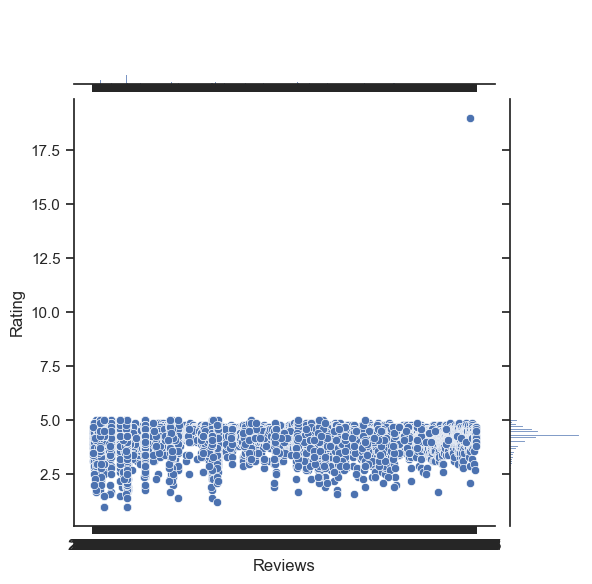

In [27]:
sns.jointplot(y='Rating', x='Reviews', data=df)
plt.show()